In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

d=pd.read_csv("data.csv")
d.head(10)

,label,keypoint,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63
0,1,<KeyPoint 0x7fcd7ff373f0>,0.000097,0.000093,0.000865,0.000336,0.059000,0.009595,0.060723,0.011210,...,0.005214,0.001915,0.000837,-0.000157,0.003490,0.001670,0.000174,-0.000048,0.000452,0.000271
1,1,<KeyPoint 0x7fcd684d6090>,0.000041,0.000090,0.000220,0.000258,0.000285,0.002320,0.002990,0.002902,...,0.039256,0.010442,0.035581,-0.009618,0.035721,0.010124,0.000035,0.000023,0.000082,0.000079
2,1,<KeyPoint 0x7fcd684d6120>,0.000409,0.000073,0.000793,0.000201,0.001902,0.000102,0.008818,0.001878,...,0.066607,0.008308,0.005185,-0.002279,0.005691,0.002728,-0.000092,0.000043,0.000123,0.000130
3,1,<KeyPoint 0x7fcd684d61b0>,0.000012,-0.000120,0.000518,0.000219,-0.002178,0.001158,0.008265,0.001981,...,0.062334,0.011628,0.011877,-0.003912,0.012280,0.004561,0.000041,0.000005,0.000041,0.000060
4,0,<KeyPoint 0x7fcd684d6210>,0.000248,0.000100,0.000340,0.000161,-0.001060,0.001720,0.003341,0.001823,...,0.058944,0.010038,0.014476,-0.004811,0.014626,0.005437,-0.000456,-0.000574,0.000738,0.000743
5,1,<KeyPoint 0x7fcd684d6240>,-0.000036,-0.000165,0.000290,0.000217,0.042065,0.009855,0.043866,0.010333,...,0.003325,0.001035,0.000567,-0.000261,0.001540,0.001246,0.000082,-0.000315,0.000503,0.000349
6,1,<KeyPoint 0x7fcd684d6270>,0.000149,0.000083,0.000233,0.000365,0.000038,-0.000183,0.000822,0.002598,...,0.061459,0.010249,0.013730,-0.004408,0.013769,0.004811,0.000130,-0.000006,0.000136,0.000126
7,1,<KeyPoint 0x7fcd684d62a0>,0.000212,0.000023,0.000250,0.000254,0.000350,0.001610,0.001230,0.002317,...,0.059331,0.010700,0.016447,-0.005159,0.016447,0.005781,-0.000868,-0.000782,0.001879,0.001225
8,0,<KeyPoint 0x7fcd684d62d0>,0.000051,-0.000071,0.000234,0.000218,0.000421,0.000123,0.001070,0.001249,...,0.057898,0.010161,0.014006,-0.002454,0.024783,0.008804,0.000137,-0.000081,0.000861,0.000950
9,0,<KeyPoint 0x7fcd684d6300>,-0.002585,-0.000881,0.004288,0.008644,-0.007652,0.034346,0.054874,0.049642,...,0.056540,0.020137,0.020447,-0.005466,0.053340,0.021220,0.002306,-0.000354,0.007797,0.003161


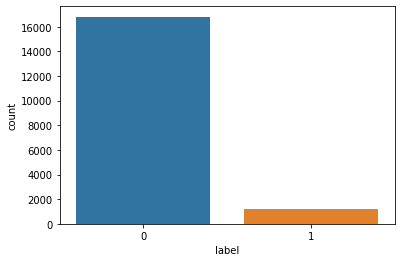

In [2]:
sns.countplot(x="label",data=d)

In [3]:
d.drop("keypoint",axis=1,inplace=True)

In [4]:
y=d["label"]
x=d.drop("label",axis=1)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test1, y_train, y_test1=train_test_split(x,y,test_size=0.25,random_state=1)

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
os=SMOTE(random_state=0)
col=x_train.columns
os_data_x,os_data_y=os.fit_sample(x_train,y_train)
os_data_x=pd.DataFrame(data=os_data_x,columns=col)
os_data_y=pd.DataFrame(data=os_data_y,columns=['label'])
print(len(os_data_y[os_data_y['label']==0]))
print(len(os_data_y[os_data_y['label']==1]))

12608
12608


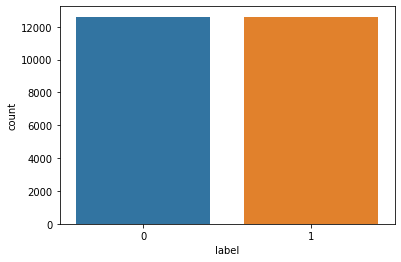

In [9]:
sns.countplot(x='label',data=os_data_y)

In [10]:
x_train, x_test, y_train, y_test=train_test_split(os_data_x,os_data_y,test_size=0.25,random_state=1)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logmodel=LogisticRegression()

In [13]:
logmodel.fit(x_train,y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
predictions=logmodel.predict(x_test)

In [15]:
from sklearn.metrics import classification_report

In [16]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.99      0.97      0.98      3178\n           1       0.97      0.99      0.98      3126\n\n    accuracy                           0.98      6304\n   macro avg       0.98      0.98      0.98      6304\nweighted avg       0.98      0.98      0.98      6304\n'

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [18]:
confusion_matrix(y_test,predictions)

array([[3076,  102],
       [  25, 3101]])

In [19]:
accuracy_score(y_test,predictions)

0.9798540609137056